## Twilight NEO simulations

Illustrating some specifics about the twilight NEO scheduler simulations.

In [1]:
# Import basic useful packages
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import healpy as hp

In [2]:
# Import MAF specific modules
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.batches as batches
import lsst.sims.maf.metricBundles as mb

In [3]:
# Import run and metric dictionaries
import run_infos as ri
import metric_infos as mi

### Basic information on the twilight NEO family

This gives us the high-level stored information on the twilight NEO family, as well as the pre-calculated summary metric values. Further down, we will calculate some targeted metrics to check out the twilight NEO visits specifically, as well as things that may be relevant for this family only.

In [4]:
families = ri.FamilyInfo()
families.read_summary_csv('all_summaries_2021_02_09.csv')
basic = families.family_info('twilight_neo')
for s in basic.index.values:
    print(f"{s} == {basic['Briefly'].loc[s]}")
basic

**twilight_neo** = explore the impact of adding a twilight NEO survey, operating on various timescales and thus requiring varying fraction of survey time. The v1.7 twilight NEO runs replace the set initially released in v1.5, improving the twilight NEO mini-survey performance for NEOs by restricting visits to low solar elongations. Twilight NEO visits are 1 second long, in r,i, and z filters. These visits are acquired in both morning and evening twilight, in sets of triplets separated by about 3 minutes.

Comparison run: baseline_nexp2_v1.7_10yrs
twi_neo_pattern1_v1.7_10yrs == On every night
twi_neo_pattern2_v1.7_10yrs == On every other night
twi_neo_pattern3_v1.7_10yrs == On every third night
twi_neo_pattern4_v1.7_10yrs == On every fourth night
twi_neo_pattern5_v1.7_10yrs == On for 4 nights, off for 4 nights
twi_neo_pattern6_v1.7_10yrs == On for 3 nights, off for 4 nights
twi_neo_pattern7_v1.7_10yrs == On for 2 nights, off for 4 nights
baseline_nexp2_v1.7_10yrs == Baseline (none)


Area with >825 visits/pointing (fO_Area)  \
twi_neo_pattern1_v1.7_10yrs                                344.949688   
twi_neo_pattern2_v1.7_10yrs                              10190.703440   
twi_neo_pattern3_v1.7_10yrs                              14904.176552   
twi_neo_pattern4_v1.7_10yrs                              16471.977081   
twi_neo_pattern5_v1.7_10yrs                              10011.933894   
twi_neo_pattern6_v1.7_10yrs                              12067.364031   
twi_neo_pattern7_v1.7_10yrs                              14768.210981   
baseline_nexp2_v1.7_10yrs                                17982.705642   

                             Unextincted area i>25.9  Nvisits total  \
twi_neo_pattern1_v1.7_10yrs             14807.657782      3013478.0   
twi_neo_pattern2_v1.7_10yrs             15061.963757      2530695.0   
twi_neo_pattern3_v1.7_10yrs             15103.928439      2369992.0   
twi_neo_pattern4_v1.7_10yrs             15122.392899      2280826.0   
twi_neo_pattern5_v1.7_10yrs             15063.642344      2533291.0   
twi_neo_pattern6_v1.7_10yrs             15036.784948      2470434.0   
twi_neo_pattern7_v1.7_10yrs             15088.821154      2367226.0   
baseline_nexp2_v1.7_10yrs               15174.429105      2045493.0   

                             Median Nvis over top 18k (fO_Nv Med)  \
twi_neo_pattern1_v1.7_10yrs                                 770.0   
twi_neo_pattern2_v1.7_10yrs                                 829.0   
twi_neo_pattern3_v1.7_10yrs                                 849.0   
twi_neo_pattern4_v1.7_10yrs                                 859.0   
twi_neo_pattern5_v1.7_10yrs                                 828.0   
twi_neo_pattern6_v1.7_10yrs                                 836.0   
twi_neo_pattern7_v1.7_10yrs                                 848.0   
baseline_nexp2_v1.7_10yrs                                   888.0   

                             Median Nvis u band  Median Nvis g band  \
twi_neo_pattern1_v1.7_10yrs                50.0                67.0   
twi_neo_pattern2_v1.7_10yrs                52.0                73.0   
twi_neo_pattern3_v1.7_10yrs                53.0                75.0   
twi_neo_pattern4_v1.7_10yrs                53.0                75.0   
twi_neo_pattern5_v1.7_10yrs                52.0                73.0   
twi_neo_pattern6_v1.7_10yrs                52.0                74.0   
twi_neo_pattern7_v1.7_10yrs                53.0                75.0   
baseline_nexp2_v1.7_10yrs                  55.0                79.0   

                             Median Nvis r band  Median Nvis i band  \
twi_neo_pattern1_v1.7_10yrs               271.0               273.0   
twi_neo_pattern2_v1.7_10yrs               202.0               206.0   
twi_neo_pattern3_v1.7_10yrs               198.0               198.0   
twi_neo_pattern4_v1.7_10yrs               197.0               197.5   
twi_neo_pattern5_v1.7_10yrs               204.0               203.0   
twi_neo_pattern6_v1.7_10yrs               199.0               200.0   
twi_neo_pattern7_v1.7_10yrs               197.0               199.0   
baseline_nexp2_v1.7_10yrs                 189.0               190.0   

                             Median Nvis z band  Median Nvis y band  \
twi_neo_pattern1_v1.7_10yrs               247.0               156.0   
twi_neo_pattern2_v1.7_10yrs               180.0               168.0   
twi_neo_pattern3_v1.7_10yrs               177.0               172.0   
twi_neo_pattern4_v1.7_10yrs               177.0               174.0   
twi_neo_pattern5_v1.7_10yrs               179.0               168.0   
twi_neo_pattern6_v1.7_10yrs               177.0               169.0   
twi_neo_pattern7_v1.7_10yrs               176.0               172.0   
baseline_nexp2_v1.7_10yrs                 170.0               180.0   

                                                       Briefly  
twi_neo_pattern1_v1.7_10yrs                     On every night  
twi_neo_pattern2_v1.7_10yrs               On every other ni

Generally speaking, the fO_Nv Median will reflect the overall effect of the additional time required for the twilight NEO visits. fO_Nv discounts shorts exposures (such as the twilight NEO visits, which are only 1s long) when counting 'visits' -- and the balance of the remainder of the survey should be staying about the same as more time is taken for visits during twilight.  Note that the overall 'Nvisits total' *does* include short visits, so you can see how the ratio between Nvisits total and fO_Nv Median changes as the number of short exposure time visits increases. 

This lets you generate an approximation of "expected impact on metrics which scale with WFD visits", as well as gives some insight on the total number of twilight NEO visits. 

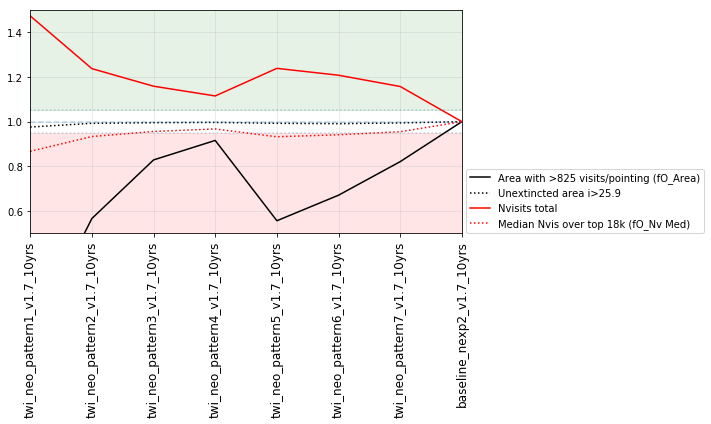

In [5]:
families.plot_areaNvis('twilight_neo')

In [6]:
# Connect to the databases.
rootDir = '/astro/store/pogo4/opsim/fbs_db/fbs_1.7'

runs = basic.index.values
opsdb = {}
for r in runs:
    if r.startswith('twi_neo'):
        ddir = 'twi_neo'
    if r.startswith('baseline'):
        ddir = 'baseline'
    opsdb[r] = db.OpsimDatabase(os.path.join(rootDir, ddir, r + '.db'))

In [7]:
rerun = False
outDir = 'twilight_neo'

In [8]:
# Pull out some of the data once .. in case we just want to make histograms. 
# We can also use it later for metrics though! 
simdata = {}
cols = ['observationStartMJD', 'observationStartLST', 
        'night', 'filter', 'fiveSigmaDepth', 'fieldRA', 'fieldDec', 
        'solarElong', 'altitude', 'seeingFwhmEff', 'skyBrightness', 
        'visitExposureTime', 'numExposures', 'airmass',]
constraint = 'note="twilight_neo"'
metadata = 'twiNeo'
satStacker = stackers.SaturationStacker()
haStacker = stackers.HourAngleStacker()
normXStacker = stackers.NormAirmassStacker()
twilights = [r for r in runs if r.startswith('twi_neo')]
for r in twilights:
    simdata[r] = opsdb[r].fetchMetricData(cols, sqlconstraint=constraint)
    simdata[r] = satStacker.run(simdata[r])
    simdata[r] = haStacker.run(simdata[r])
    simdata[r] = normXStacker.run(simdata[r])

In [9]:
morning = {}
evening = {}
for r in twilights:
    evening[r] = np.where(simdata[r]['HA'] > 0)[0]
    morning[r] = np.where(simdata[r]['HA'] < 0)[0]

### Distribution of various parameters for twilight NEO visits

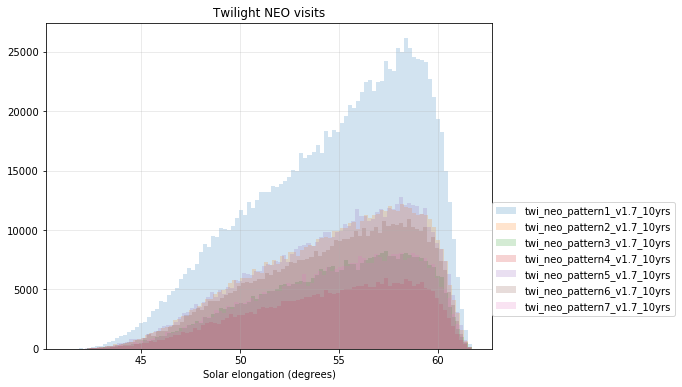

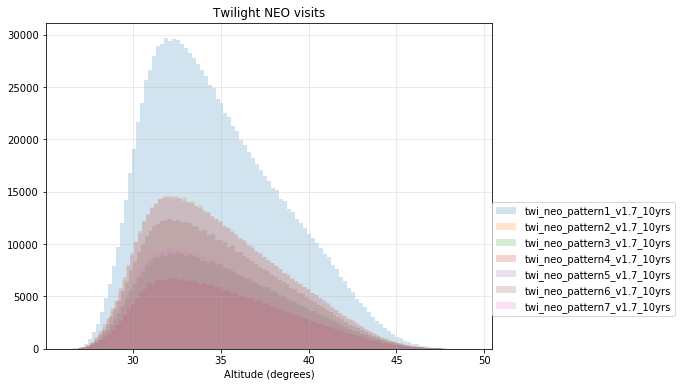

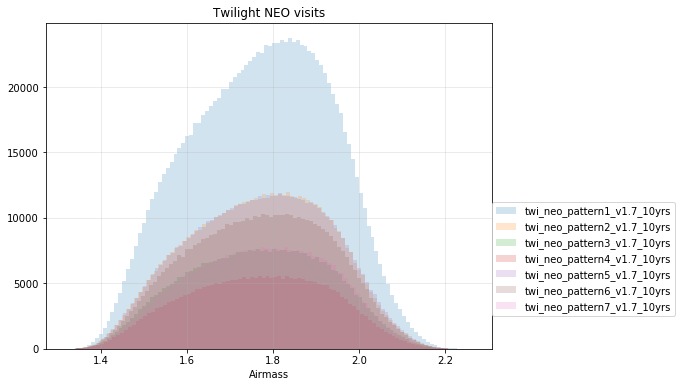

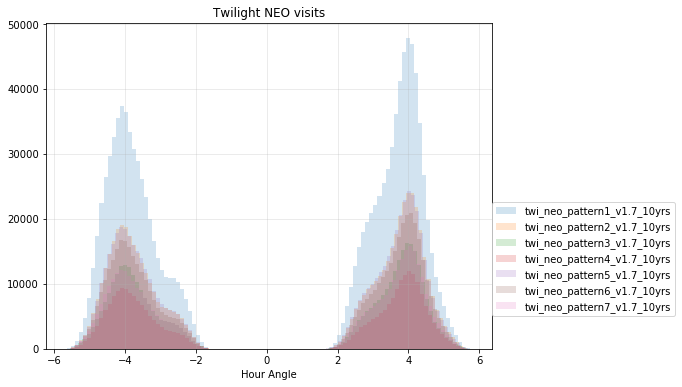

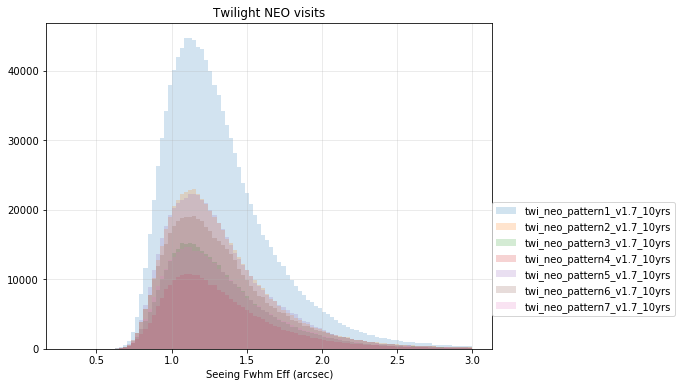

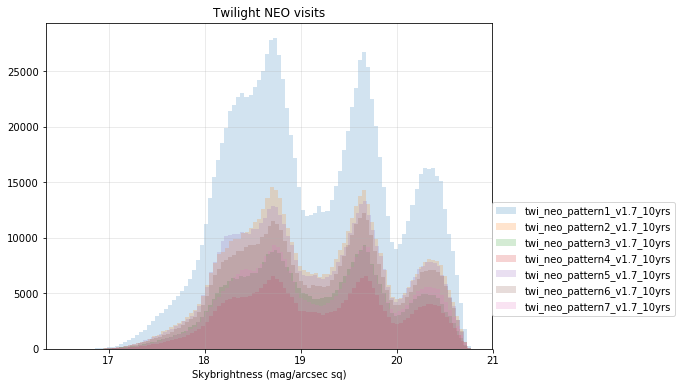

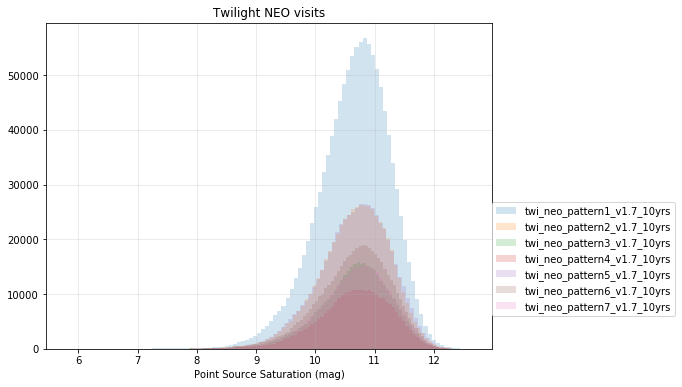

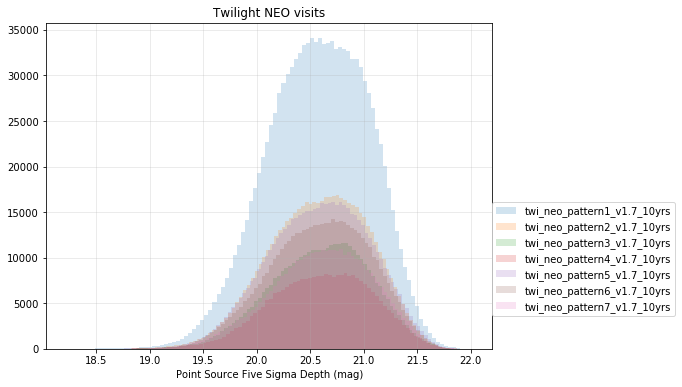

In [10]:
k = ['solarElong', 'altitude', 'airmass', 'HA', 'seeingFwhmEff', 'skyBrightness', 'saturation_mag', 'fiveSigmaDepth']
xl = ['Solar elongation (degrees)', 'Altitude (degrees)', 'Airmass', 'Hour Angle', 'Seeing Fwhm Eff (arcsec)', 
     'Skybrightness (mag/arcsec sq)', 'Point Source Saturation (mag)', 'Point Source Five Sigma Depth (mag)']

for ki, xli in zip(k, xl):
    plt.figure(figsize=(8, 6))
    if ki == 'seeingFwhmEff':
        range = [0.3, 3.0]
    else:
        range = None
    for r in twilights:
        n,b,p = plt.hist(simdata[r][ki], bins=100, alpha=0.2, range=range, label=r)
    plt.legend(loc=(1.0, 0.1), fancybox=True)
    plt.grid(True, alpha=0.3)
    plt.xlabel(xli)
    plt.title('Twilight NEO visits')

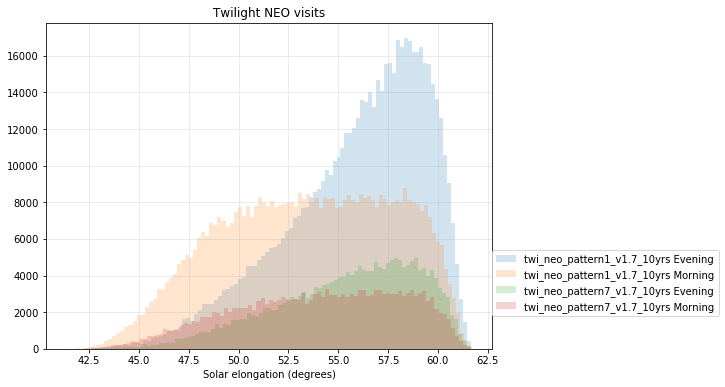

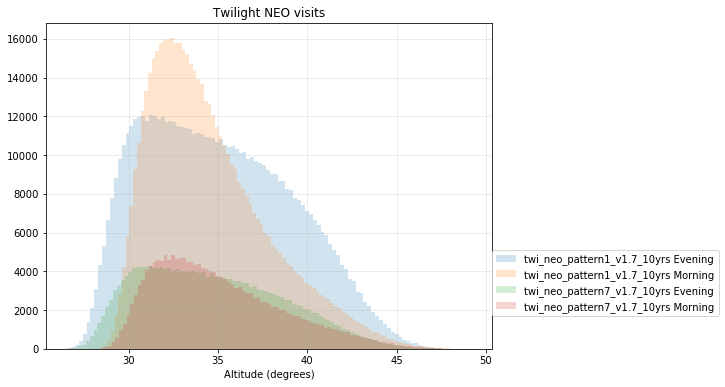

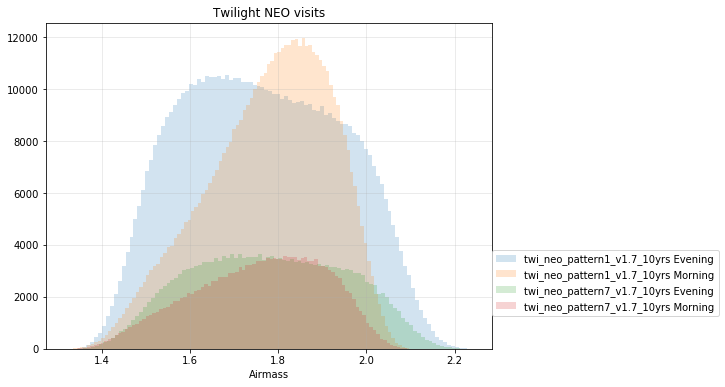

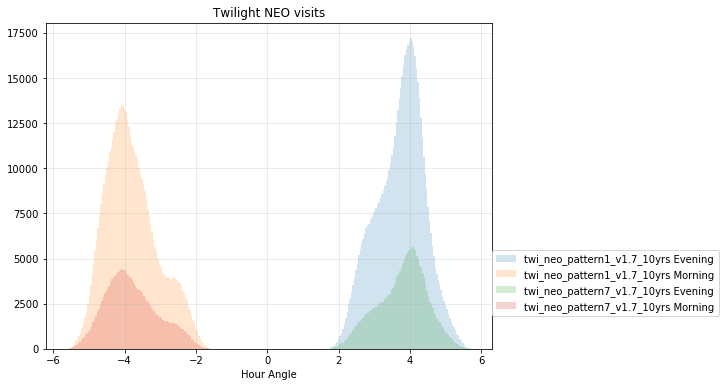

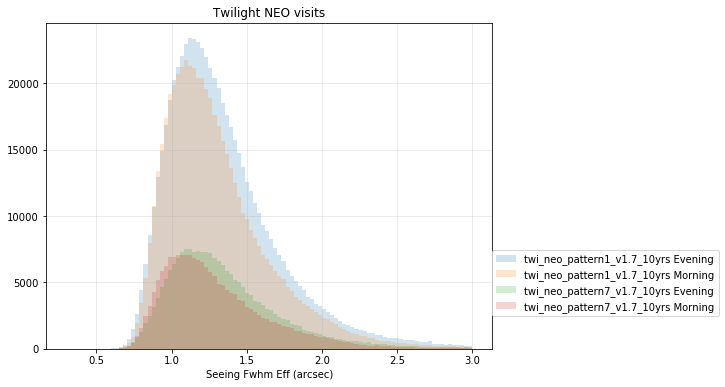

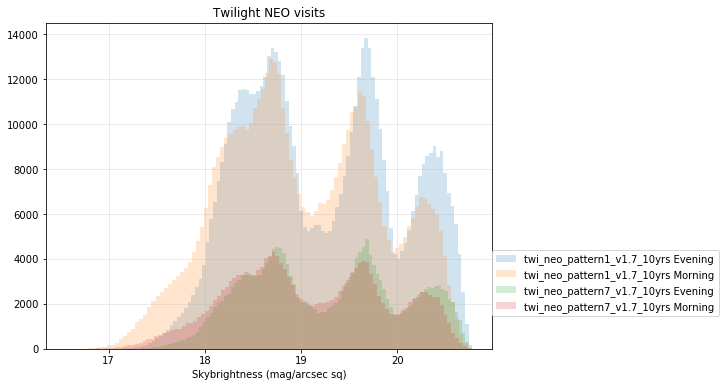

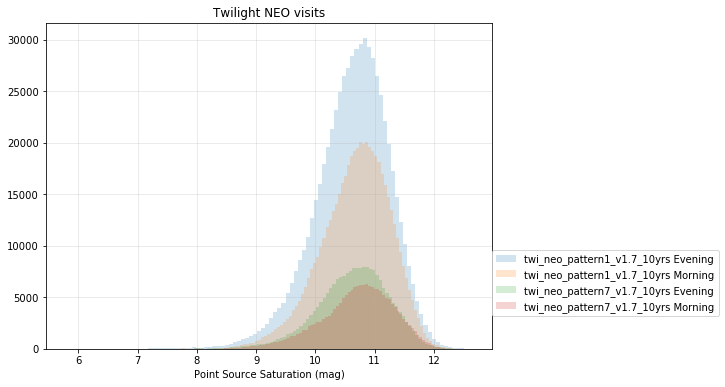

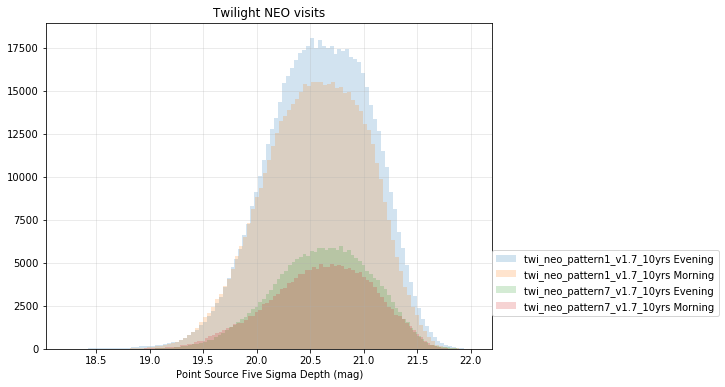

In [11]:
for ki, xli in zip(k, xl):
    plt.figure(figsize=(8, 6))
    if ki == 'seeingFwhmEff':
        range = [0.3, 3.0]
    else:
        range = None
    for r in [twilights[0], twilights[-1]]:
        n,b,p = plt.hist(simdata[r][ki][evening[r]], bins=100, alpha=0.2, range=range, label=r + ' Evening')
        n,b,p = plt.hist(simdata[r][ki][morning[r]], bins=100, alpha=0.2, range=range, label=r + ' Morning')
    plt.legend(loc=(1.0, 0.1), fancybox=True)
    plt.grid(True, alpha=0.3)
    plt.xlabel(xli)
    plt.title('Twilight NEO visits')

### Distribution of visits on the sky

In [12]:
ph = plots.PlotHandler(outDir=outDir, savefig=True, figformat='png', thumbnail=False)

In [13]:
# Plot all nights 
skyplots = {}
plotFuncs = [plots.HealpixSkyMap()]
for r in twilights:
    m = metrics.CountMetric(col='observationStartMJD', metricName='Nvisits')
    s = slicers.HealpixSlicer(nside=64)
    # Plot all twilight neo visits
    metadata = 'Twilight NEO All'
    skyplots[r + '_all'] = mb.MetricBundle(m, s, runName=r, metadata=metadata, plotFuncs=plotFuncs)
    metadata = 'Twilight NEO Morning'
    skyplots[r + '_morn'] = mb.MetricBundle(m, s, runName=r, metadata=metadata, plotFuncs=plotFuncs)
    metadata = 'Twilight NEO Evening'
    skyplots[r + '_eve'] = mb.MetricBundle(m, s, runName=r, metadata=metadata, plotFuncs=plotFuncs)
    # Plot visits on a singlee night with >400 twilight neo visits
    nights = np.unique(simdata[r]['night'])
    nidx = np.searchsorted(simdata[r]['night'], nights)
    nvis_per_night = np.diff(nidx)
    night = nights[np.where(nvis_per_night > 400)[0][0]]
    metadata = f'Twilight NEO night={night}'
    skyplots[r + '_night'] = mb.MetricBundle(m, s, runName=r, metadata=metadata, plotFuncs=plotFuncs)
    if not rerun:
        d = simdata[r]
        g = mb.MetricBundleGroup({r: skyplots[r + '_all']}, opsdb[r], outDir=outDir, resultsDb=None)
        g.runCurrent('', simData=d)
        d = simdata[r][morning[r]]
        g = mb.MetricBundleGroup({r: skyplots[r + '_morn']}, opsdb[r], outDir=outDir, resultsDb=None)
        g.runCurrent('', simData=d)
        d = simdata[r][evening[r]]
        g = mb.MetricBundleGroup({r: skyplots[r + '_eve']}, opsdb[r], outDir=outDir, resultsDb=None)
        g.runCurrent('', simData=d)
        d = simdata[r][np.where(simdata[r]['night'] == night)]
        g = mb.MetricBundleGroup({r: skyplots[r + '_night']}, opsdb[r], outDir=outDir, resultsDb=None)
        g.runCurrent('', simData=d)
    if rerun:
        skyplots[r+'_all'].read(os.path.join(outDir, skyplots[r+'_all'].fileRoot + '.npz'))
        skyplots[r+'_morn'].read(os.path.join(outDir, skyplots[r+'_morn'].fileRoot + '.npz'))
        skyplots[r+'_eve'].read(os.path.join(outDir, skyplots[r+'_eve'].fileRoot + '.npz'))
        skyplots[r+'_night'].read(os.path.join(outDir, skyplots[r+'_night'].fileRoot + '.npz'))

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Running:  ['twi_neo_pattern1_v1.7_10yrs']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Running:  ['twi_neo_pattern1_v1.7_10yrs']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Running:  ['twi_neo_pattern1_v1.7_10yrs']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Running:  ['twi_neo_pattern1_v1.7_10yrs']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Running:  ['twi_neo_pattern2_v1.7_10yrs']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Running:  ['twi_neo_pattern2_v1.7_10yrs']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Running:  ['twi_neo_pattern2_v1.7_10yrs']
Comp

/ssd/lsst/lsst_stack_w_2021_03/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


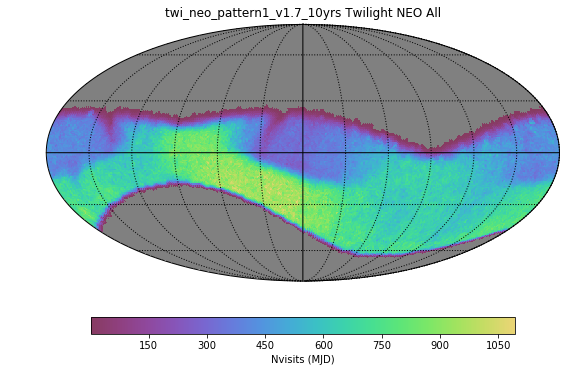

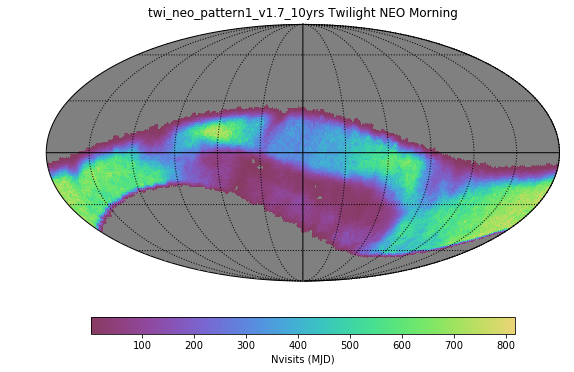

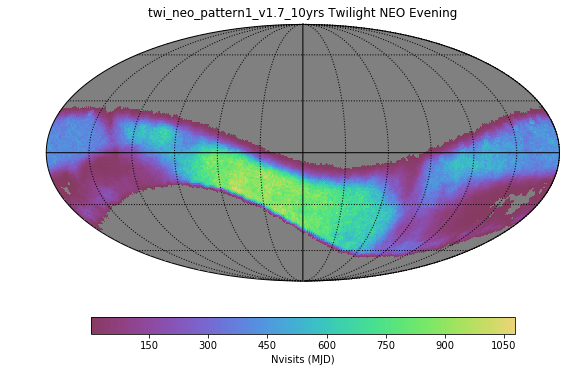

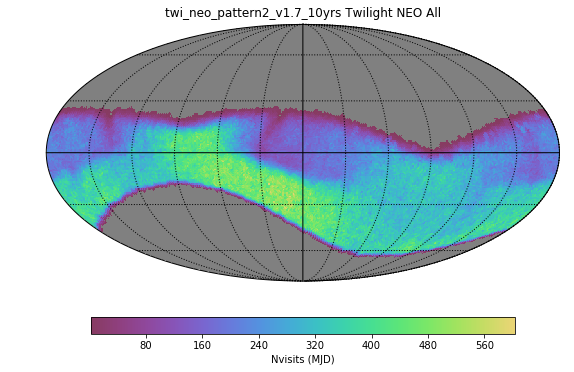

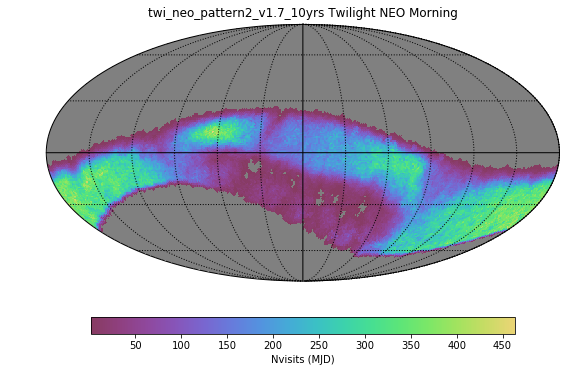

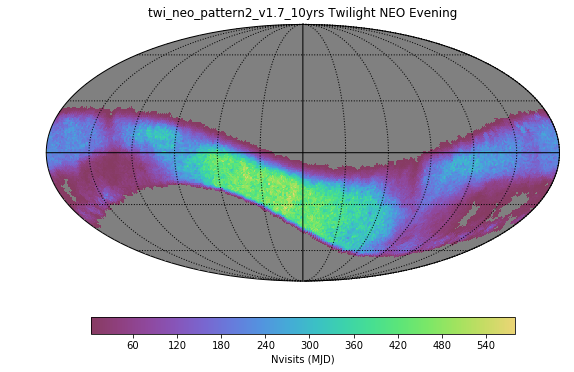

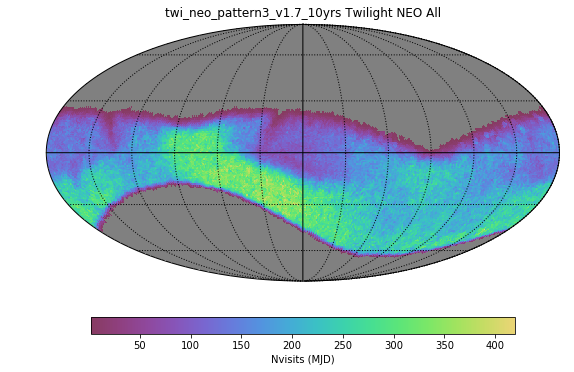

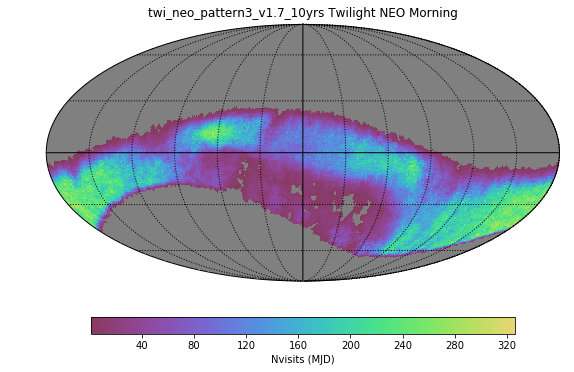

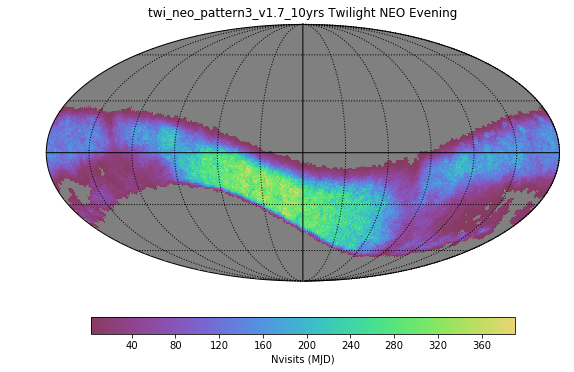

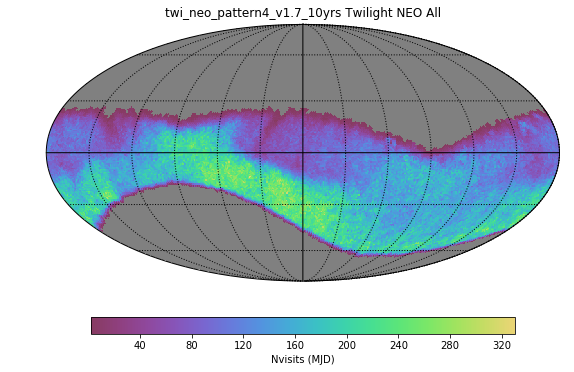

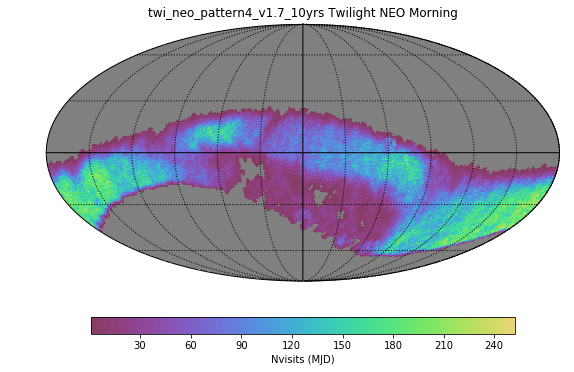

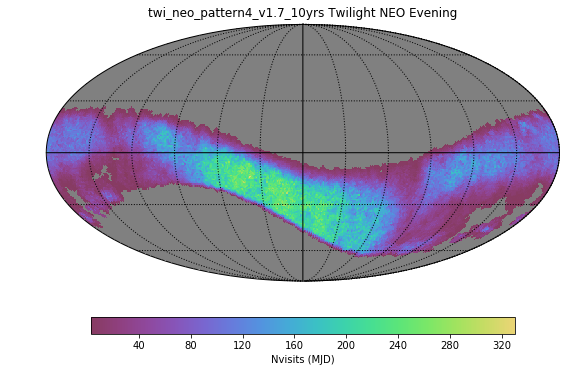

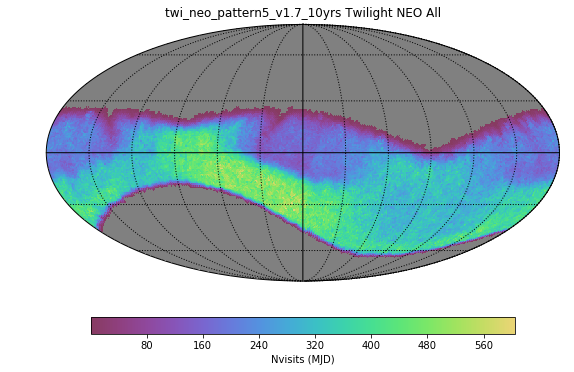

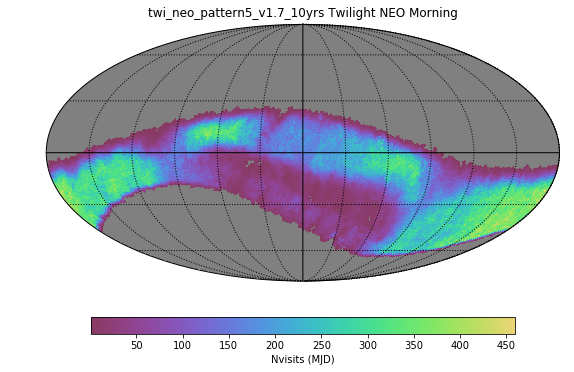

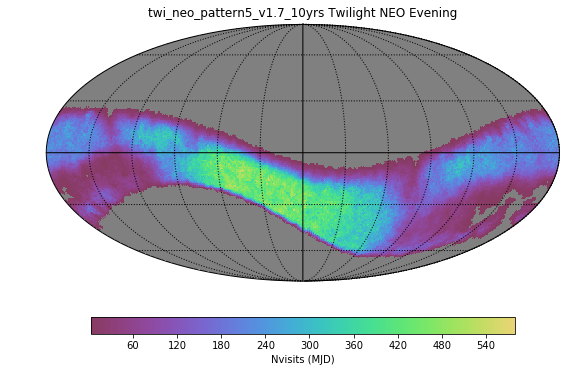

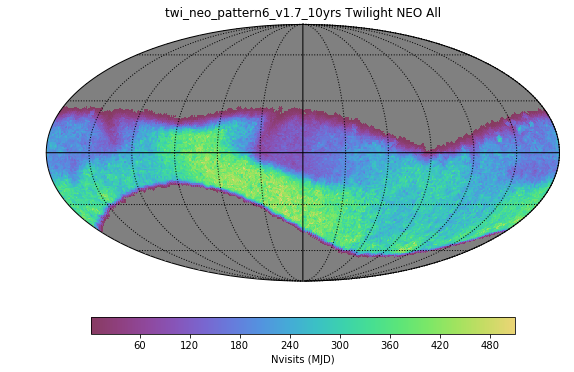

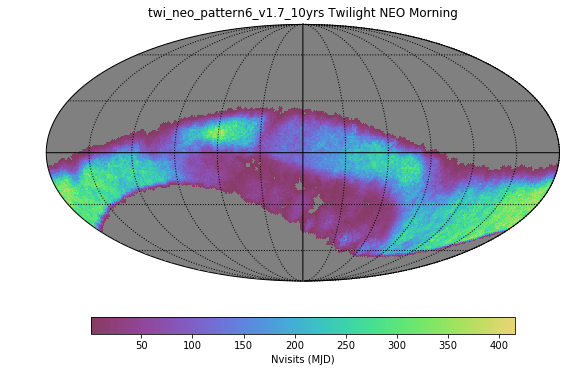

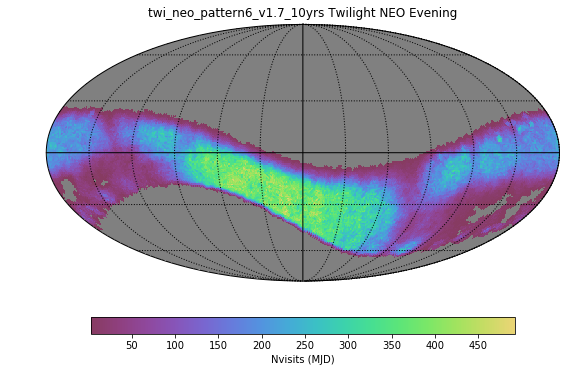

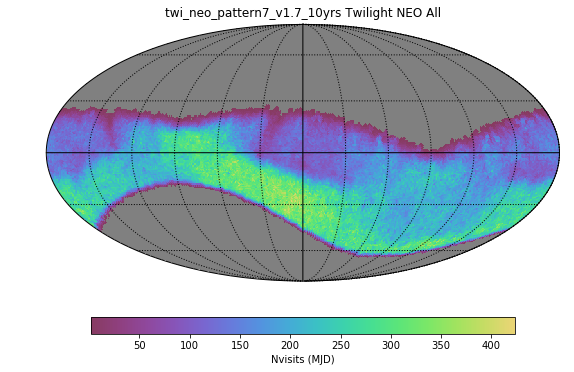

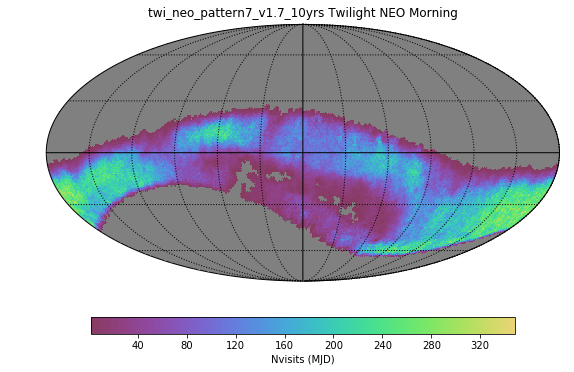

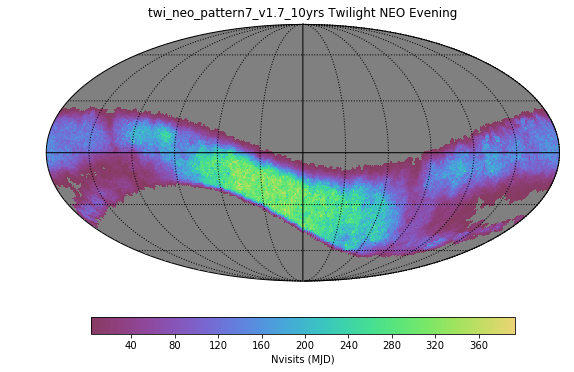

In [14]:
for r in twilights:
    skyplots[r +'_all'].setPlotDict({'title': f"{r} {skyplots[r+'_all'].metadata}", 
                                 'figsize': (8, 5)})
    skyplots[r +'_morn'].setPlotDict({'title': f"{r} {skyplots[r+'_morn'].metadata}", 
                                 'figsize': (8, 5)})
    skyplots[r +'_eve'].setPlotDict({'title': f"{r} {skyplots[r+'_eve'].metadata}", 
                                 'figsize': (8, 5)})
    skyplots[r + '_night'].setPlotDict({'title': f"{r} {skyplots[r+'_night'].metadata}",
                                       'figsize': (8,5), 'colorMax': 10})
    ph.setMetricBundles([skyplots[r+'_all']])
    ph.plot(plotFunc=plots.HealpixSkyMap())
    ph.setMetricBundles([skyplots[r+'_morn']])
    ph.plot(plotFunc=plots.HealpixSkyMap())
    ph.setMetricBundles([skyplots[r+'_eve']])
    ph.plot(plotFunc=plots.HealpixSkyMap())

### Distribution of visits in time

In [15]:
hourglass = {}
for r in twilights:
    s = slicers.HourglassSlicer()
    m = metrics.HourglassMetric()
    hourglass[r] = mb.MetricBundle(m, s, None, metadata='Twilight NEO yr 1', runName=r)
    d = simdata[r][np.where(simdata[r]['night'] < 366)]
    g = mb.MetricBundleGroup({r: hourglass[r]}, opsdb[r], outDir=outDir, resultsDb=None)
    g.runCurrent('', simData=d)

Running:  ['twi_neo_pattern1_v1.7_10yrs']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Running:  ['twi_neo_pattern2_v1.7_10yrs']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Running:  ['twi_neo_pattern3_v1.7_10yrs']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Running:  ['twi_neo_pattern4_v1.7_10yrs']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Running:  ['twi_neo_pattern5_v1.7_10yrs']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Running:  ['twi_neo_pattern6_v1.7_10yrs']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Running:  ['twi_neo_pattern7_v1.7_10yrs']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In these hourglass plots, the blue line = 6 degree twilight, the yellow line = 12 degree twilight, and the red line = 18 degree twilight.  The black wavey line shows the phase of the moon. 

Visits for the twilight NEO survey *only* are shown; they are color-coded by their filter.

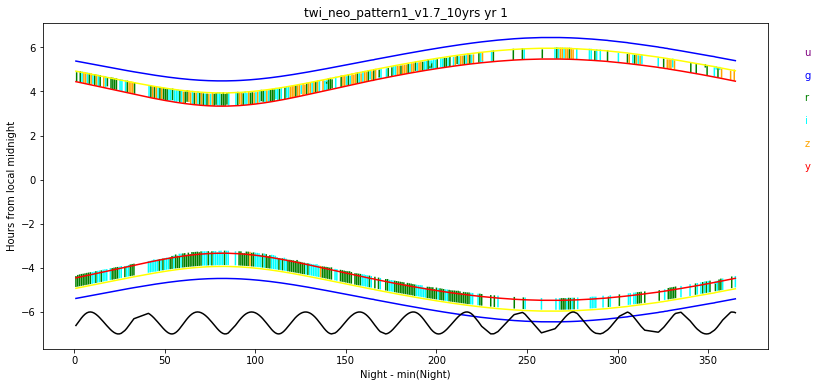

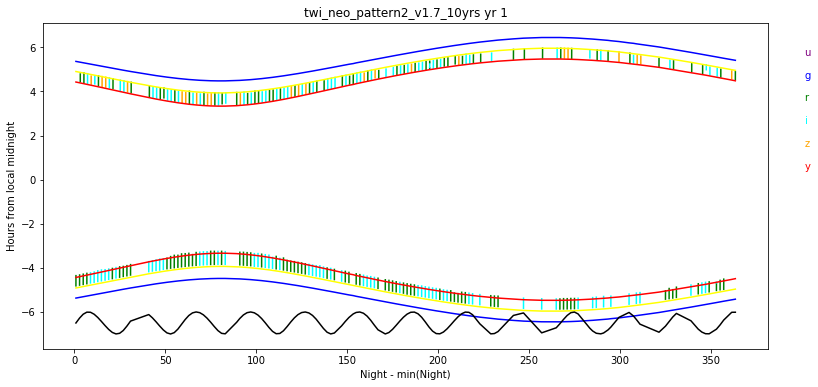

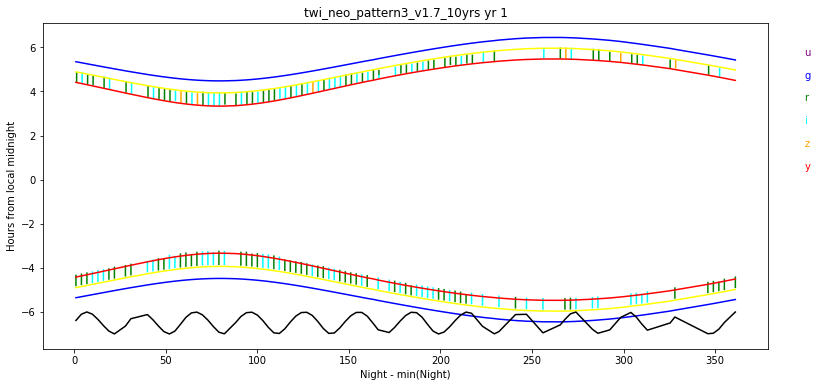

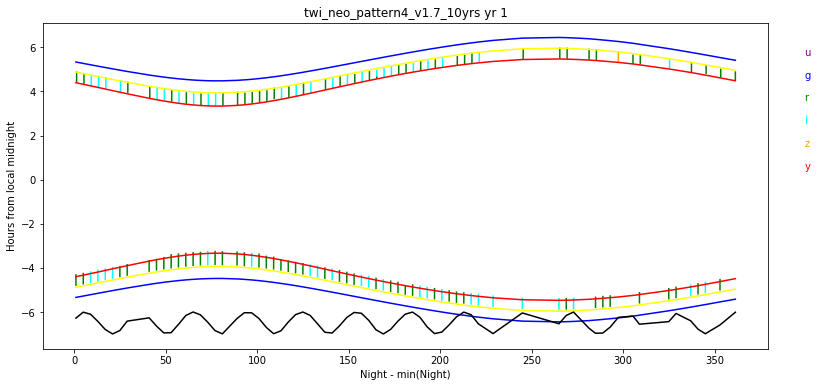

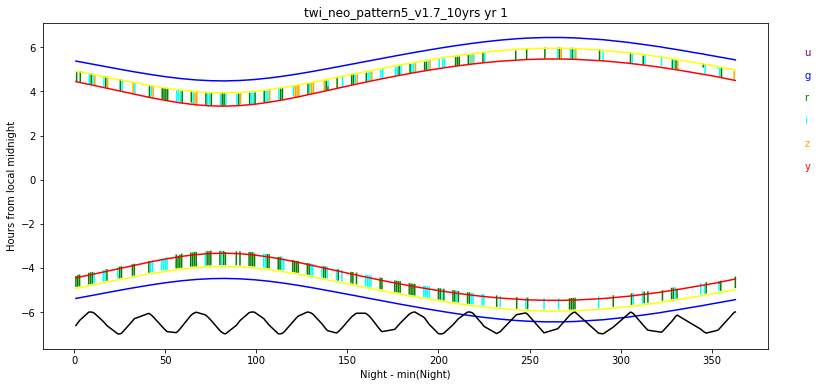

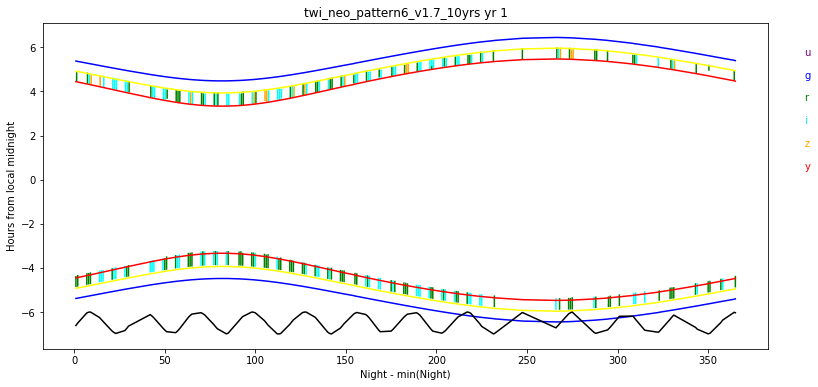

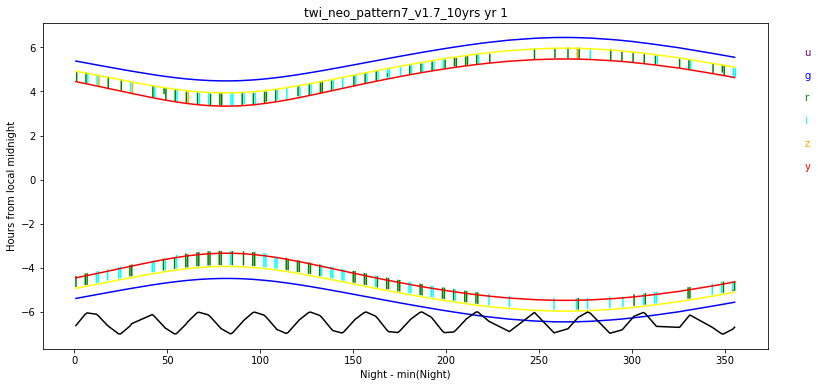

In [16]:
hourglassPlot = plots.HourglassPlot()
for r in twilights:
    fig = plt.figure(figsize=(13, 6))
    hourglassPlot(hourglass[r].metricValues, hourglass[r].slicer, {'title': f'{r} yr 1'}, fignum=fig.number)

In [17]:
m = metrics.CountMetric(col='observationStartMJD', metricName='NvisitsPerNight')
s = slicers.OneDSlicer(sliceColName='night', binsize=1)
summarystats = [metrics.MeanMetric(), metrics.MedianMetric(), metrics.CountMetric(metricName='NNights'),
                metrics.PercentileMetric(metricName='25th%ile', percentile=25),
                metrics.PercentileMetric(metricName='75th%ile', percentile=75), 
                metrics.SumMetric(metricName='Total NEOvis')]

neopernight = {}
for r in twilights:
    neopernight[r]= mb.MetricBundle(m, s, None, metadata='Twilight NEO', runName=r, summaryMetrics=summarystats)
    g = mb.MetricBundleGroup({r: neopernight[r]}, opsdb[r], outDir=outDir, resultsDb=None)
    g.runCurrent('', simdata[r])

Running:  ['twi_neo_pattern1_v1.7_10yrs']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Running:  ['twi_neo_pattern2_v1.7_10yrs']


/ssd/lsst/lsst_repos/sims_maf/python/lsst/sims/maf/slicers/oneDSlicer.py:74: UserWarning: Both binsize and bins have been set; Using binsize 1.000000 only.
  warnings.warn('Both binsize and bins have been set; Using binsize %f only.' %(self.binsize))


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Running:  ['twi_neo_pattern3_v1.7_10yrs']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Running:  ['twi_neo_pattern4_v1.7_10yrs']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Running:  ['twi_neo_pattern5_v1.7_10yrs']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Running:  ['twi_neo_pattern6_v1.7_10yrs']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Running:  ['twi_neo_pattern7_v1.7_10yrs']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


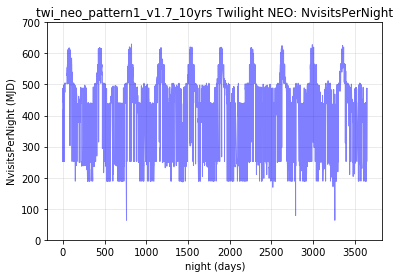

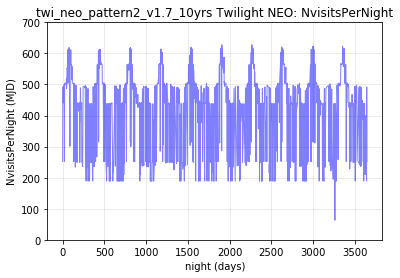

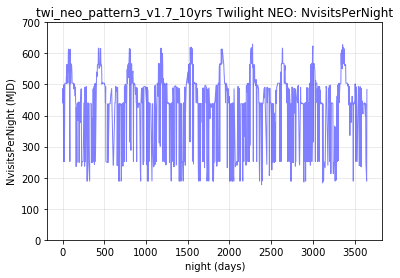

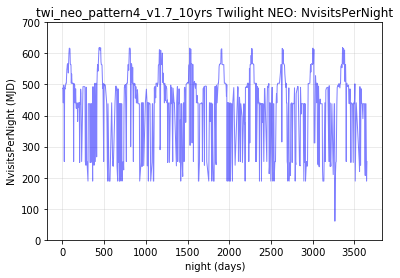

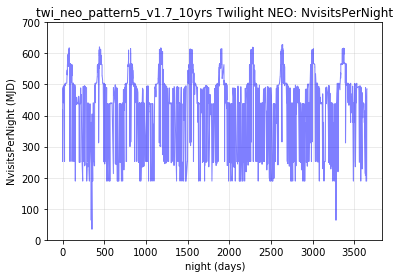

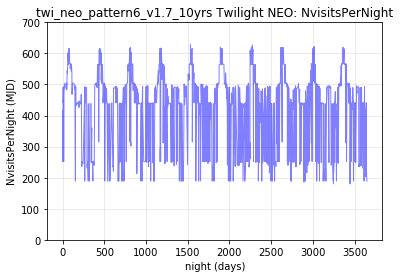

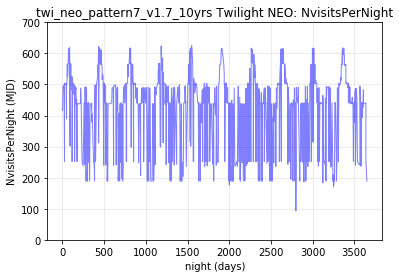

In [18]:
ph = plots.PlotHandler(outDir=outDir, savefig=True, figformat='png', thumbnail=False)
for r in twilights:
    ph.setMetricBundles([neopernight[r]])
    ph.plot(plotFunc=plots.OneDBinnedData(), plotDicts={'yMin':0, 'yMax':700})

In [19]:
neocols = ['Mean', "Median", "NNights", "Total NEOvis"]
j = pd.DataFrame([neopernight[r].summaryValues for r in twilights], index=twilights)[neocols].join(basic[['Briefly']])
j

Mean  Median  NNights  Total NEOvis  \
twi_neo_pattern1_v1.7_10yrs  429.110545   441.0     2750     1180054.0   
twi_neo_pattern2_v1.7_10yrs  431.567153   441.0     1370      591247.0   
twi_neo_pattern3_v1.7_10yrs  432.307440   441.0      914      395129.0   
twi_neo_pattern4_v1.7_10yrs  428.104322   441.0      671      287258.0   
twi_neo_pattern5_v1.7_10yrs  430.763043   441.0     1380      594453.0   
twi_neo_pattern6_v1.7_10yrs  434.209380   441.0     1194      518446.0   
twi_neo_pattern7_v1.7_10yrs  430.555921   441.0      912      392667.0   

                                                       Briefly  
twi_neo_pattern1_v1.7_10yrs                     On every night  
twi_neo_pattern2_v1.7_10yrs               On every other night  
twi_neo_pattern3_v1.7_10yrs               On every third night  
twi_neo_pattern4_v1.7_10yrs              On every fourth night  
twi_neo_pattern5_v1.7_10yrs  On for 4 nights, off for 4 nights  
twi_neo_pattern6_v1.7_10yrs  On for 3 nights, off for 4 nights  
twi_neo_pattern7_v1.7_10yrs  On for 2 nights, off for 4 nights

### Number of Visits within a night

In [20]:
bundles = {}
countbins = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 200], int)
countbins = countbins - 0.5

for r in twilights:
    # Histogram the number of visits per night, for these twilight NEO visits.
    m = metrics.NVisitsPerNightMetric(nightCol='night', bins=countbins,
                                           metricName="NVisitsPerNight")
    slicerSmall = slicers.HealpixSlicer(nside=128, radius=0.75)  # Should contain only the center pointings
    slicerNormal = slicers.HealpixSlicer(nside=128, radius=1.75) # Full inscribed FOV
    plotDict = {'bins': countbins, 'xlabel': 'Number of visits each night'}
    plotFunc = plots.SummaryHistogram()

    bundles[r + '_small'] = mb.MetricBundle(m, slicerSmall, None, plotDict=plotDict, runName=r, 
                                       metadata='points', plotFuncs=[plotFunc])
    bundles[r + '_normal'] = mb.MetricBundle(m, slicerNormal, None, plotDict=plotDict, runName=r, 
                                       metadata='circles', plotFuncs=[plotFunc])
    if not rerun:
        g = mb.MetricBundleGroup({r: bundles[r + '_small'], 2: bundles[r + '_normal']}, opsdb[r], 
                                 outDir=outDir, resultsDb=None)
        g.runCurrent('', simdata[r])
    if rerun:
        for k in bundles:
            bundles[k].read(os.path.join(outDir, bundles[k].fileRoot + '.npz'))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Running:  ['twi_neo_pattern1_v1.7_10yrs']
Completed metric generation.
Running:  [2]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Running:  ['twi_neo_pattern2_v1.7_10yrs']
Completed metric generation.
Running:  [2]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Running:  ['twi_neo_pattern3_v1.7_10yrs']
Completed metric generation.
Running:  [2]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Healpix slice

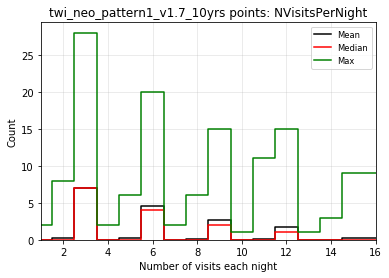

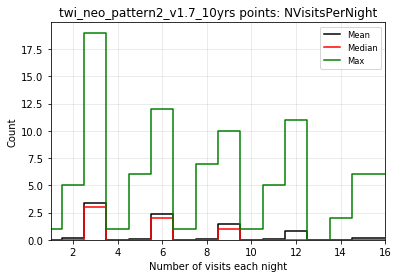

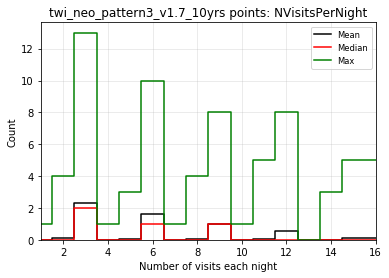

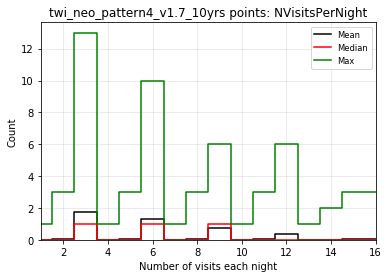

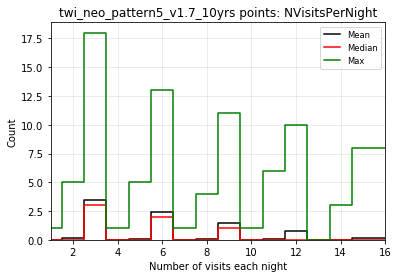

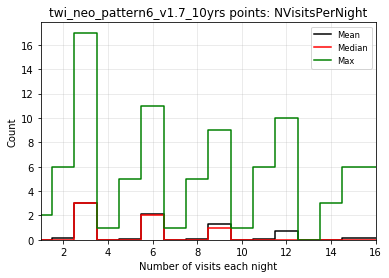

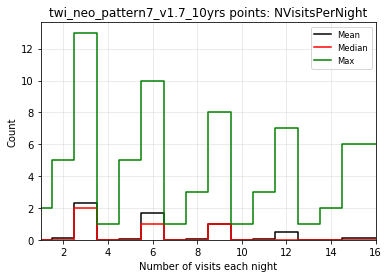

In [21]:
for r in twilights:
    bu = [bundles[r+'_small'], bundles[r+'_small'], bundles[r+'_small']]
    ph.setMetricBundles(bu)
    colors = ['k', 'b', 'c', 'g', 'y', 'r', 'm']
    plotdicts = [{'color': 'k', 'metricReduce': metrics.MeanMetric(), 'label': 'Mean'},
                 {'color': 'r', 'metricReduce': metrics.MedianMetric(), 'label': 'Median'},
                 {'color': 'g', 'metricReduce': metrics.MaxMetric(), 'label': 'Max',
                 'legendlocal': (1.01, 0.2), 'yMin': 0, 'xMin': 1, 'xMax': 16}]
    ph.plot(plotFunc=plots.SummaryHistogram(), plotDicts=plotdicts)

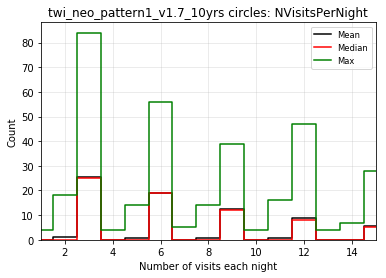

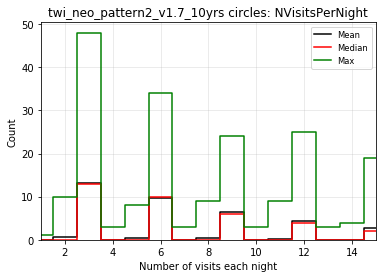

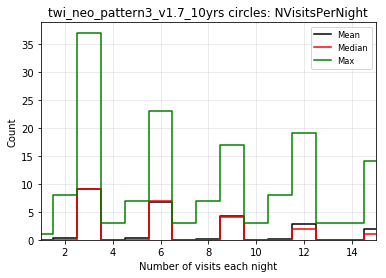

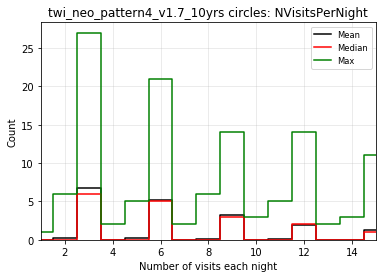

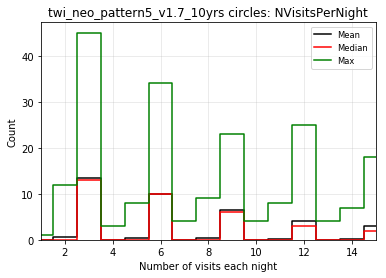

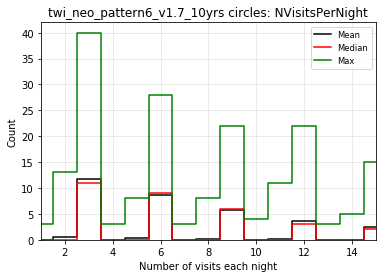

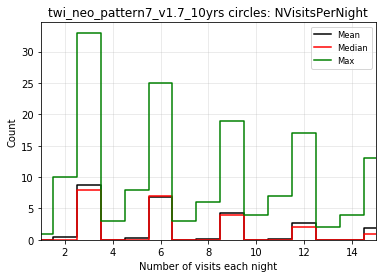

In [22]:
for r in twilights:
    bu = [bundles[r+'_normal'], bundles[r+'_normal'], bundles[r+'_normal']]
    ph.setMetricBundles(bu)
    colors = ['k', 'b', 'c', 'g', 'y', 'r', 'm']
    plotdicts = [{'color': 'k', 'metricReduce': metrics.MeanMetric(), 'label': 'Mean'},
                 {'color': 'r', 'metricReduce': metrics.MedianMetric(), 'label': 'Median'},
                 {'color': 'g', 'metricReduce': metrics.MaxMetric(), 'label': 'Max',
                 'legendlocal': (1.01, 0.2), 'yMin': 0, 'xMin': 1, 'xMax': 15}]
    ph.plot(plotFunc=plots.SummaryHistogram(), plotDicts=plotdicts)

Based on the multiple visits per night using the 'point' version of the slicer, we see that the number of visits to a given pointing is often more than 3 times per night, and sometimes is as often as 15 times per night. It's likely the scheduler is covering these pointings more than 3 times in a night because it runs out of area available to be observed in a given night (due to solar elongation constraints, airmass constraints, where the horizon is, and where the moon is) -- and the scheduler has been told to obtain visits over this region, during the time period of twilight, and does not have a constraint against revisiting fields more than 3 times. 

However, looking back up to the skyplots above in the 'distribution on sky' section, we also see that the sky covered in morning twilight and evening twilight is different .. and that neither one are covering quite as far to the north the standard footprint. This may be because of an airmass constraint on the twilight NEO survey (X<2) - which together with the goal of low solar elongation, restricts the available sky. There could also be some subtle effects from the solar elongation constraint itself.

This suggests two improvements for the twilight NEO survey as simulated:
* re-evaluate the airmass constraint and solar elongation constraints to see how much sky could be covered during twilight in each night. 
* if the available sky cna be covered three times in less than the full amount of twilight (as seems likely), then we should restrict the amount of time available to the twilight survey in each night further.

This doesn't mean the twilight NEO survey is not useful, as simulated -- it just means that it could be slightly more useful for NEOs while still using even less time, and we can estimate how much less impactful it could be if run in this further-tuned fashion. 

In [27]:
# useful utilities for the evaluation here ..
def squish_hist(metricValue):
    # Change an array of arrays (dtype=object) to a 2-d array of correct dtype
    mV = np.array(metricValue.compressed().tolist(), dtype=[('metricValue', int)])
    # Make an array to hold the combined result
    finalHist = np.zeros(mV.shape[1], dtype=float)
    # Loop over each bin and use the selected metric to combine the results
    for i in np.arange(finalHist.size):
        finalHist[i] = mV[:, i]['metricValue'].sum()
    return finalHist

def subval_hist(metricValue, i):
    # Pull out the value at one bin
    finalVal = np.zeros(len(metricValue), float)
    for j, (mV, mVmask) in enumerate(zip(metricValue, metricValue.mask)):
        if mVmask:
            finalVal[j] = hp.UNSEEN
        else:
            finalVal[j] = mV[i]
    return finalVal

twi_neo_pattern1_v1.7_10yrs_small 673664.0 947221.0 1.4060733540756223
twi_neo_pattern1_v1.7_10yrs_small 1.9622148627903815 1.4444444444444444


/ssd/lsst/lsst_stack_w_2021_03/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/ssd/lsst/lsst_stack_w_2021_03/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


twi_neo_pattern1_v1.7_10yrs_normal 2573856.0 4857980.0 1.8874327079681226
twi_neo_pattern1_v1.7_10yrs_normal 2.535977104965113 1.9705882352941178
twi_neo_pattern2_v1.7_10yrs_small 325145.0 480977.0 1.4792692491042458
twi_neo_pattern2_v1.7_10yrs_small 2.008991680845772 1.5
twi_neo_pattern2_v1.7_10yrs_normal 1318918.0 2446720.0 1.855096374452392
twi_neo_pattern2_v1.7_10yrs_normal 2.4672005550404394 1.9285714285714286
twi_neo_pattern3_v1.7_10yrs_small 218603.0 323041.0 1.4777519064239741
twi_neo_pattern3_v1.7_10yrs_small 1.8736842082204255 1.4
twi_neo_pattern3_v1.7_10yrs_normal 899082.0 1642251.0 1.8265864515138774
twi_neo_pattern3_v1.7_10yrs_normal 2.4209994247821838 1.9090909090909092
twi_neo_pattern4_v1.7_10yrs_small 161031.0 238252.0 1.479541206351572
twi_neo_pattern4_v1.7_10yrs_small 1.7701506650487902 1.3333333333333333
twi_neo_pattern4_v1.7_10yrs_normal 666923.0 1208126.0 1.8114924811410014
twi_neo_pattern4_v1.7_10yrs_normal 2.3800120943503895 1.8888888888888888
twi_neo_pattern5_v1

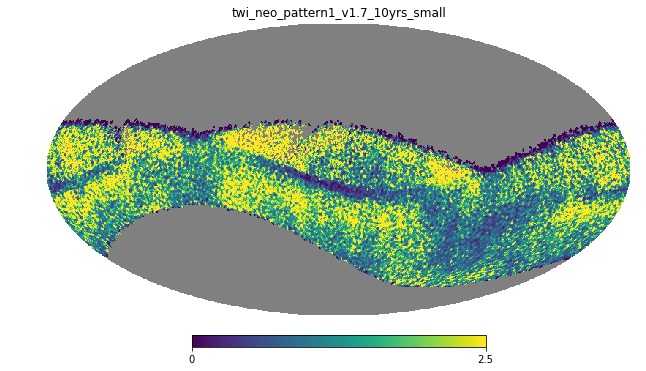

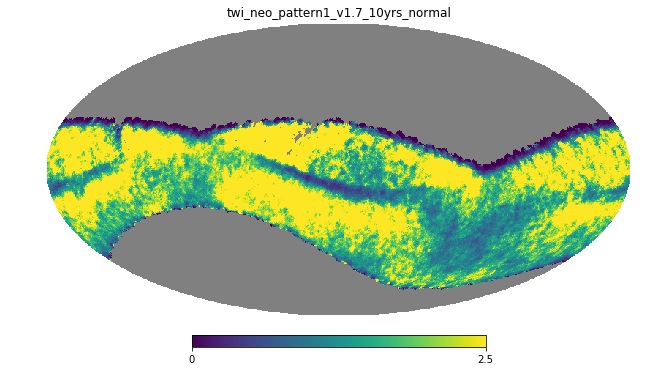

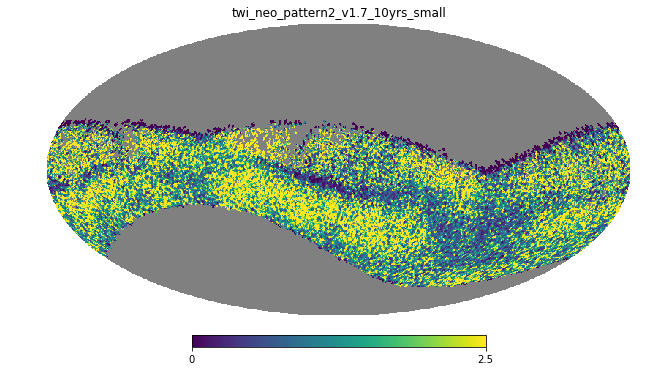

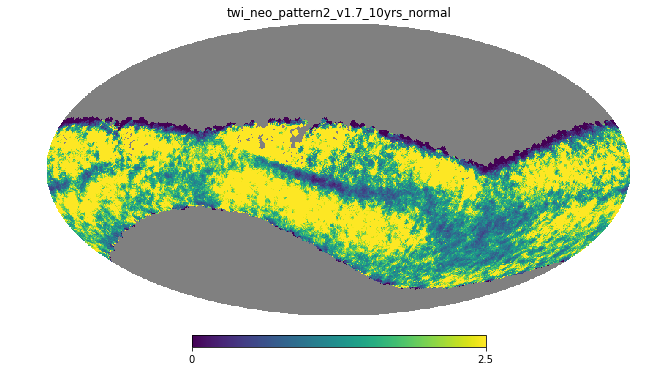

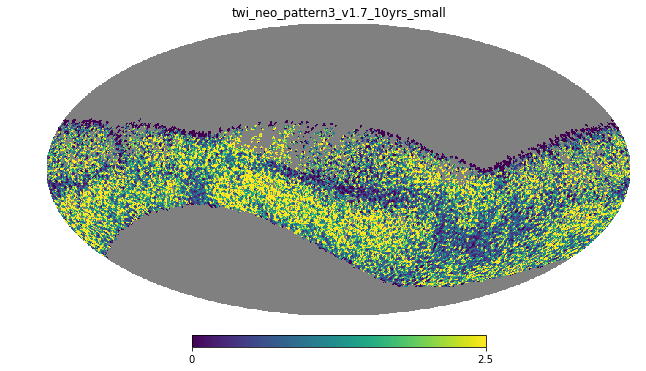

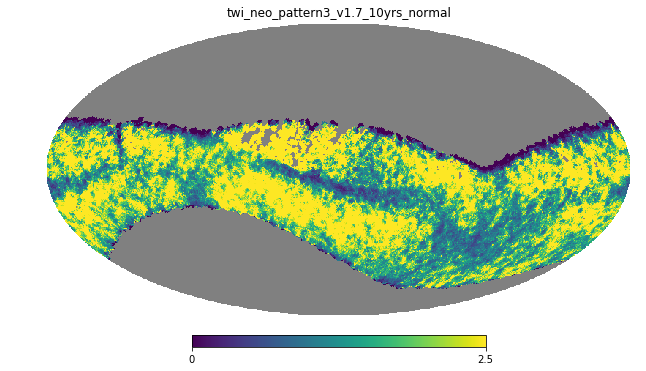

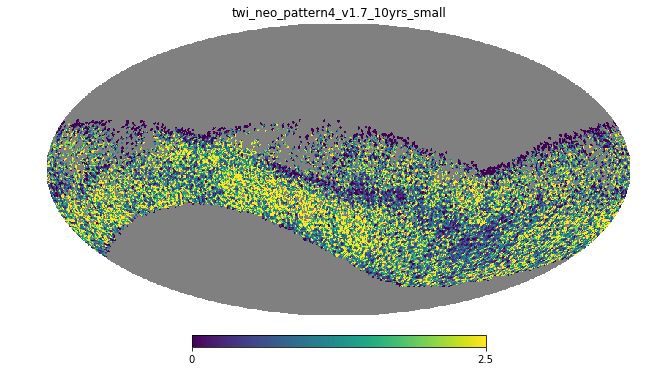

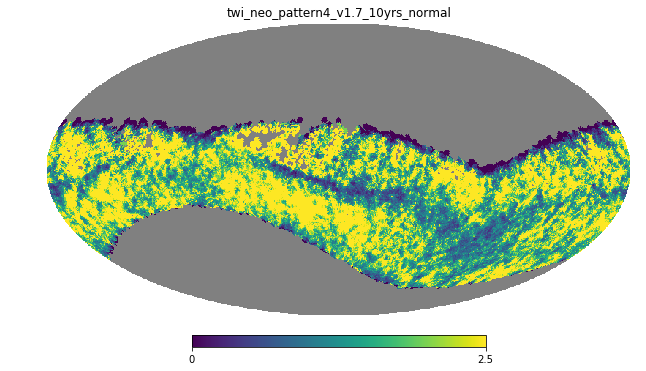

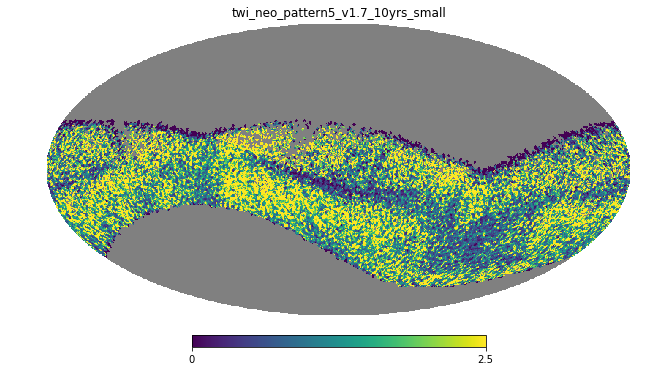

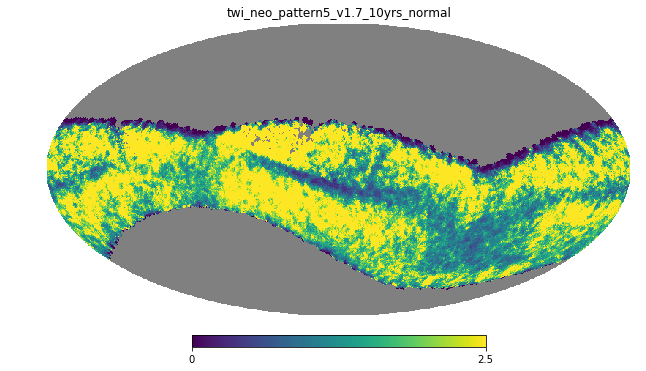

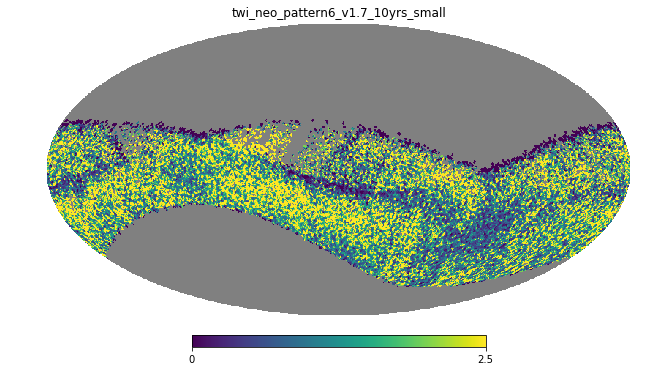

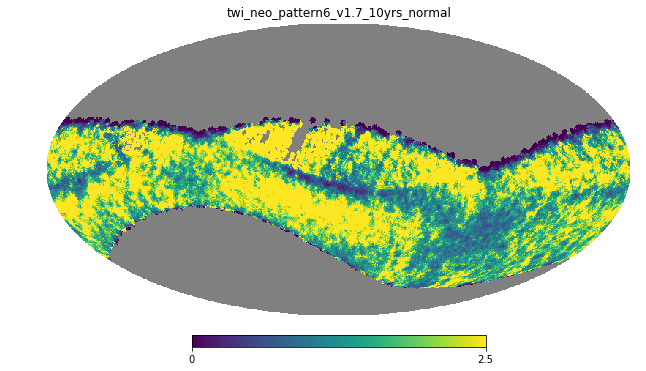

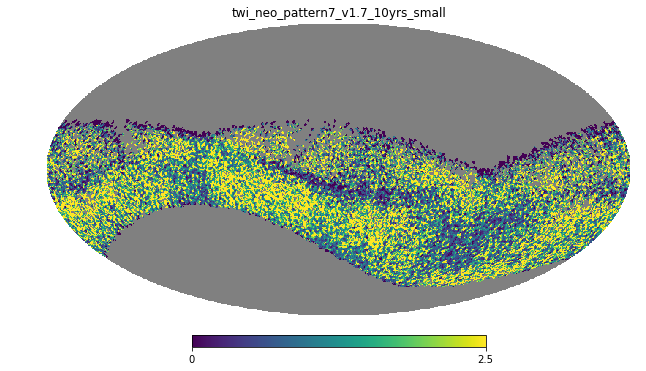

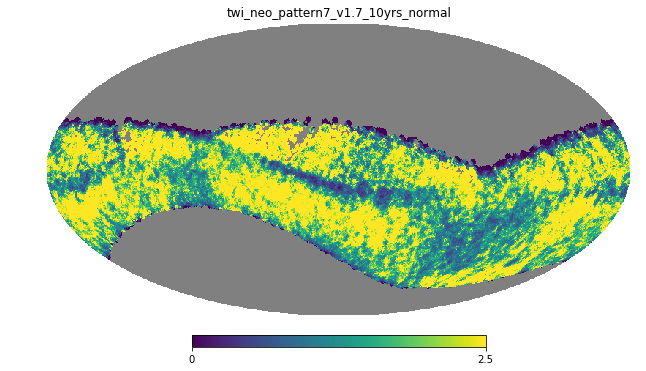

In [28]:
for r in twilights:
    for t in ['_small', '_normal']:
        # nights with N=3 visits
        v = subval_hist(bundles[r+t].metricValues, 2)
        a = np.where(v>0, v, 0)
        # nights with 3<N<6 visits
        v = subval_hist(bundles[r+t].metricValues, 3)
        for i in np.arange(4, len(countbins)-1):
            v += subval_hist(bundles[r+t].metricValues, i)
        b = np.where(v>0, v, 0)                       
        print(r+t, a.sum(), b.sum(), b.sum()/a.sum())
        ratio = np.where(a > 0, b/a, hp.UNSEEN)
        hp.mollview(ratio, min=0, max=2.5, title=r+t)
        print(r+t, np.mean(ratio[np.where(ratio>0)]), np.median(ratio[np.where(ratio>0)]))

From these estimates of how many nights receive >3 visits vs. how many nights receive only 3 visits, it seems that about 1/2 of the time the field receives only 3 visits, and the rest of the time it's >3. This suggests we could cut the time allocated to the twilight NEO survey by at least 50% without a significant impact to the NEO completeness boost from this minisurvey.

### Impact/Benefits

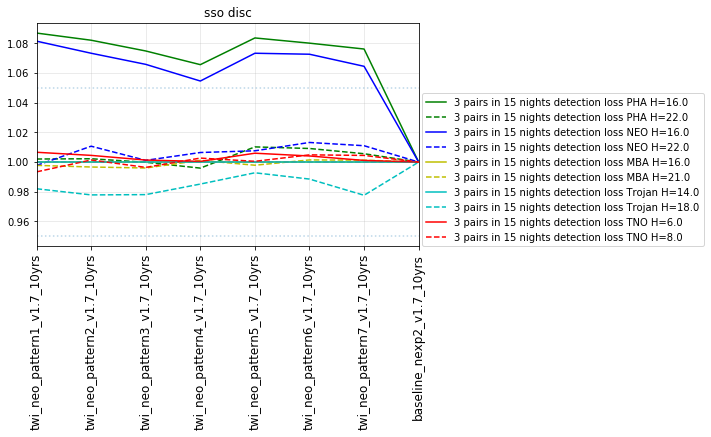

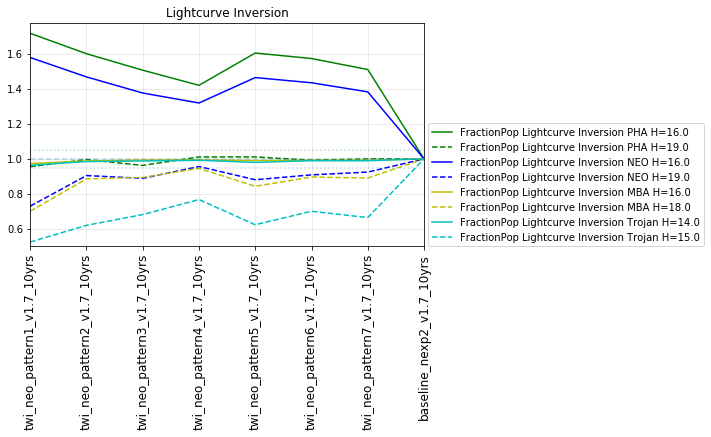

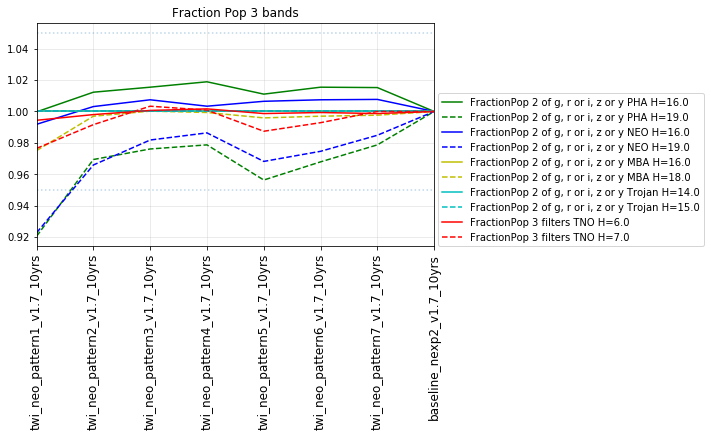

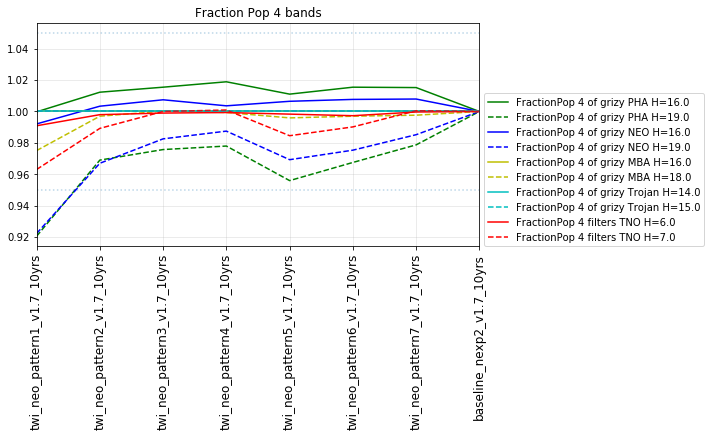

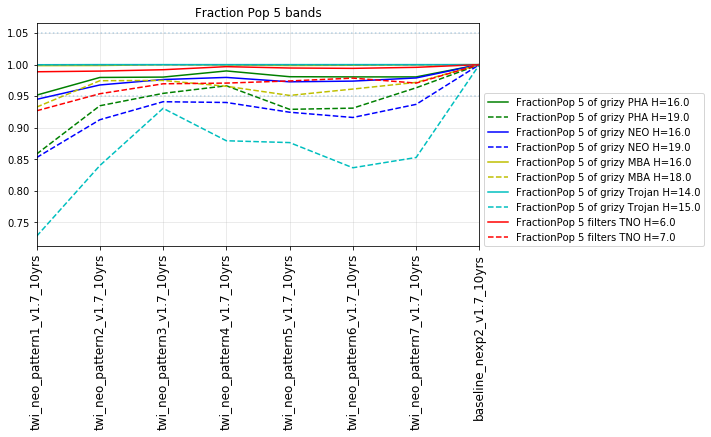

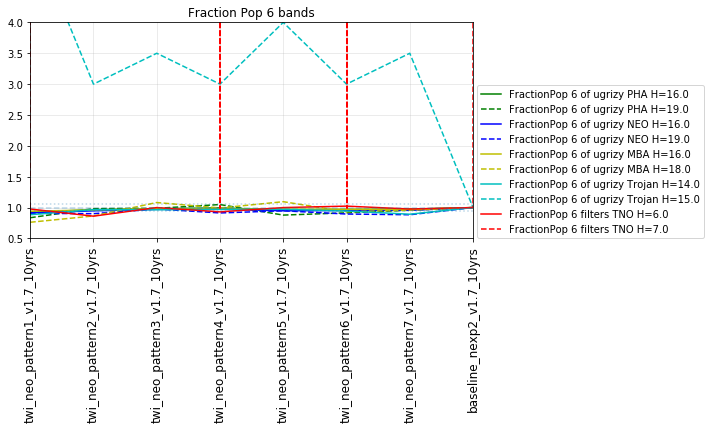

In [33]:
# Summary metrics relating to solar system objects
baseline = families.family_baseline['twilight_neo']
d = families.summaries.loc[families.family['twilight_neo']]
for mset in mi.sso_metrics:
    t = d[mi.sso_metrics[mset]]
    tmp = ri.norm_df(t, baseline)
    ri.plot(tmp, style=mi.styles['sso'])
    ylims = plt.ylim()
    if ylims[0] < 0.5:
        plt.ylim(bottom=0.5)
    if ylims[1] > 4:
        plt.ylim(top=4)
    plt.title(f"{mset}")

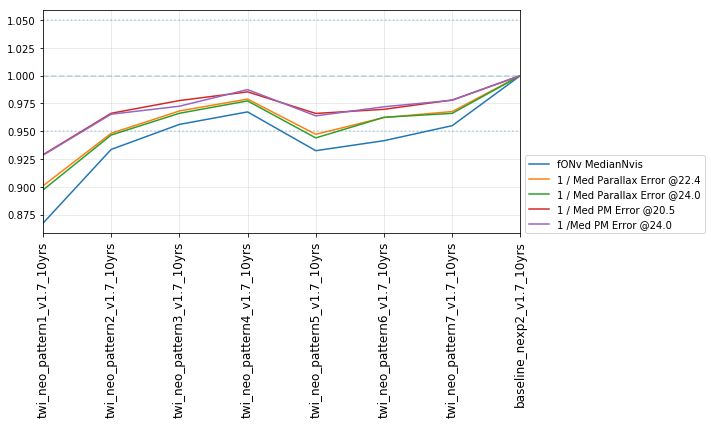

In [36]:
# Impact to SRD metrics (a good place to start in overall impact to other science goals)
t = d[mi.metrics['srd']]
tmp = ri.norm_df(t, baseline, invert_cols=mi.invert_cols['srd'], mag_cols=mi.mag_cols['srd'])
tmp.columns = mi.short_names_norm['srd']
ri.plot(tmp)

In [74]:
joint = d[mi.sso_metrics['sso disc']]\
    .join(d[['Nvisits Long Exp','fONv MedianNvis fO All visits HealpixSlicer']])

In [77]:
jt = ri.norm_df(joint, baseline)

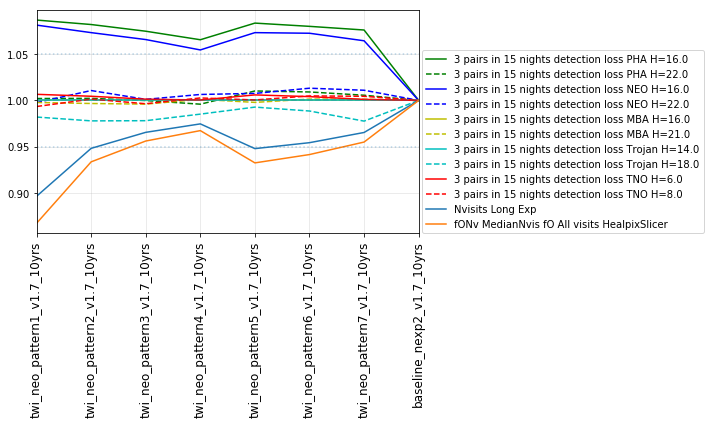

In [78]:
ri.plot(jt, style=mi.styles['sso'])

In [80]:
ri.norm_df(j, 'twi_neo_pattern7_v1.7_10yrs')

Mean  Median   NNights  Total NEOvis  \
twi_neo_pattern1_v1.7_10yrs  0.996643     1.0  3.015351      3.005228   
twi_neo_pattern2_v1.7_10yrs  1.002349     1.0  1.502193      1.505721   
twi_neo_pattern3_v1.7_10yrs  1.004068     1.0  1.002193      1.006270   
twi_neo_pattern4_v1.7_10yrs  0.994306     1.0  0.735746      0.731556   
twi_neo_pattern5_v1.7_10yrs  1.000481     1.0  1.513158      1.513886   
twi_neo_pattern6_v1.7_10yrs  1.008485     1.0  1.309211      1.320320   
twi_neo_pattern7_v1.7_10yrs  1.000000     1.0  1.000000      1.000000   

                                                       Briefly  
twi_neo_pattern1_v1.7_10yrs                     On every night  
twi_neo_pattern2_v1.7_10yrs               On every other night  
twi_neo_pattern3_v1.7_10yrs               On every third night  
twi_neo_pattern4_v1.7_10yrs              On every fourth night  
twi_neo_pattern5_v1.7_10yrs  On for 4 nights, off for 4 nights  
twi_neo_pattern6_v1.7_10yrs  On for 3 nights, off for 4 nights  
twi_neo_pattern7_v1.7_10yrs  On for 2 nights, off for 4 nights

If we're assuming that we could cut the number of visits in the twilight NEO minisurvey by 50% without a loss of NEO improvement, this suggests that we could take the NEO completeness values from `pattern1` while only having the impact of `pattern2`, or the boost from `pattern 2` while only having the impact from `pattern 4`. This would result in aboost of ~8% completeness in the bright NEOs while only reducing the fONv_Median (which is a standin for many metrics that scale with number of visits in WFD) by about 4%. 